In [5]:
import pandas as pd
import random
import numpy as np



In [6]:
np.random.seed(42)
random.seed(42)

df = pd.read_csv('kaggle/train_net.csv', index_col='ID')


df.head()

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,...,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT
ID,,,,,,,,,,,,,,,,,,,,,
0,372018590,udp,53950,10.114.232.40,53,10.114.226.5,1647760833,1,1647760833,17,...,0,0,0,165,2,275,2,1647760873,0.0,NaN
1,368604472,tcp,37914,10.114.241.166,38303,10.114.224.218,1647686725,1,1647686725,6,...,0,0,0,44,1,40,1,1647687338,0.0,Port Scanning
2,367513992,tcp,33216,10.114.241.166,18757,10.114.224.116,1647680044,0,1647680044,6,...,0,0,0,44,1,40,1,1647680115,1.0,Port Scanning
3,371997670,udp,48627,10.114.225.205,53,10.114.226.5,1647760172,0,1647760172,17,...,0,0,0,128,2,160,2,1647760207,0.0,NaN
4,374311119,udp,35939,10.114.225.205,53,10.114.226.5,1647780916,0,1647780916,17,...,0,0,0,172,2,300,2,1647780984,0.0,NaN


In [7]:
df['PROTOCOL_MAP'].unique()

array(['udp', 'tcp', 'icmp', 'gre', 'skip', 'ipv6-icmp', 'ipv6'],
      dtype=object)

In [8]:
df['ALERT'].value_counts()

ALERT
Port Scanning        507845
Denial of Service     50392
Malware                 388
Name: count, dtype: int64

In [9]:
attack_map = {
    'Port Scanning': 2,
    'Denial of Service': 1,
    'Malware': 3
}
protocol_map = {
    'tcp': 0,
    'udp': 1,
    'icmp': 2,
    'ipv6': 3,
    'ipv6-icmp': 4,
    'gre': 5,
    'skip': 6
}

df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].map(protocol_map)

df['ALERT'] = df['ALERT'].map(attack_map)
df['ALERT'] = df['ALERT'].fillna(0)

print(df['ALERT'].value_counts(), df['ALERT'].unique())

ALERT
0.0    3659000
2.0     507845
1.0      50392
3.0        388
Name: count, dtype: int64 [0. 2. 1. 3.]


In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4217625 entries, 0 to 4217624
Data columns (total 32 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   FLOW_ID                     4217625 non-null  int64  
 1   PROTOCOL_MAP                4217625 non-null  int64  
 2   L4_SRC_PORT                 4217625 non-null  int64  
 3   IPV4_SRC_ADDR               4217625 non-null  object 
 4   L4_DST_PORT                 4217625 non-null  int64  
 5   IPV4_DST_ADDR               4217625 non-null  object 
 6   FIRST_SWITCHED              4217625 non-null  int64  
 7   FLOW_DURATION_MILLISECONDS  4217625 non-null  int64  
 8   LAST_SWITCHED               4217625 non-null  int64  
 9   PROTOCOL                    4217625 non-null  int64  
 10  TCP_FLAGS                   4217625 non-null  int64  
 11  TCP_WIN_MAX_IN              4217625 non-null  int64  
 12  TCP_WIN_MAX_OUT             4217625 non-null  int64  
 13  TC

In [11]:
import ipaddress

unique_ips = df['IPV4_SRC_ADDR'].unique()
is_private_dict = {ip: ipaddress.ip_address(ip).is_private for ip in unique_ips}

count_private = df['IPV4_SRC_ADDR'].map(is_private_dict).sum()

count_public = len(df) - count_private

print(f"Adresy prywatne: {count_private}")
print(f"Adresy publiczne: {count_public}")

Adresy prywatne: 3491446
Adresy publiczne: 726179


In [12]:
df = df.drop(labels=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1)
df.head()

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,L4_DST_PORT,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS,TCP_WIN_MAX_IN,...,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT
ID,,,,,,,,,,,,,,,,,,,,,
0,372018590,1,53950,53,1647760833,1,1647760833,17,0,0,...,0,0,0,165,2,275,2,1647760873,0.0,0.0
1,368604472,0,37914,38303,1647686725,1,1647686725,6,22,1024,...,0,0,0,44,1,40,1,1647687338,0.0,2.0
2,367513992,0,33216,18757,1647680044,0,1647680044,6,22,1024,...,0,0,0,44,1,40,1,1647680115,1.0,2.0
3,371997670,1,48627,53,1647760172,0,1647760172,17,0,0,...,0,0,0,128,2,160,2,1647760207,0.0,0.0
4,374311119,1,35939,53,1647780916,0,1647780916,17,0,0,...,0,0,0,172,2,300,2,1647780984,0.0,0.0


In [14]:
X = df.drop(columns=['ALERT'])
y = df['ALERT']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 0=Normal, 1=DoS, 2=Probe, 3=
from sklearn.ensemble import RandomForestClassifier
import joblib # Do zapisywania modeli
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

attack_types = {
    2: 'Port Scanning',
    1: 'Denial of Service',
    3: 'Malware'
}

results = {} 


for attack_id, attack_name in attack_types.items():
    print(f"--- Trenowanie modelu: Normal vs {attack_name} ---")
    
   
    target_classes = [0, attack_id]
    train_mask = y_train.isin(target_classes)
    
    X_train_special = X_train[train_mask]
    y_train_special = y_train[train_mask]
    
    rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
    rf.fit(X_train_special, y_train_special)
    
   
    filename = f'kaggle-model_rf_normal_vs_{attack_name}.joblib'
    joblib.dump(rf, filename)
    print(f"Model zapisano jako {filename}")

    
    y_pred = rf.predict(X_test)
    
    
    cm = confusion_matrix(y_test, y_pred)
    

    y_pred_binary = (y_pred != 0).astype(int) 


    cm_final = pd.crosstab(
        y_test, 
        y_pred_binary, 
        rownames=['Prawdziwa Klasa'], 
        colnames=[f'Decyzja Modelu ({attack_name})']
    )

    model_labels = {
        0: 'Normal', 
        1: f'Alarm: {attack_name}'
    }
    
    
    cm_readable = cm_final.rename(index=attack_types, columns=model_labels)
    
    
    results[attack_name] = cm_final
    
    print(cm_readable)
    print("\n")


--- Trenowanie modelu: Normal vs Port Scanning ---
Model zapisano jako kaggle-model_rf_normal_vs_Port Scanning.joblib
Decyzja Modelu (Port Scanning)  Normal  Alarm: Port Scanning
Prawdziwa Klasa                                             
0.0                             731795                    15
Denial of Service                10054                     0
Port Scanning                       12                101583
Malware                             66                     0


--- Trenowanie modelu: Normal vs Denial of Service ---
Model zapisano jako kaggle-model_rf_normal_vs_Denial of Service.joblib
Decyzja Modelu (Denial of Service)  Normal  Alarm: Denial of Service
Prawdziwa Klasa                                                     
0.0                                 731810                         0
Denial of Service                        0                     10054
Port Scanning                       101595                         0
Malware                                 66 

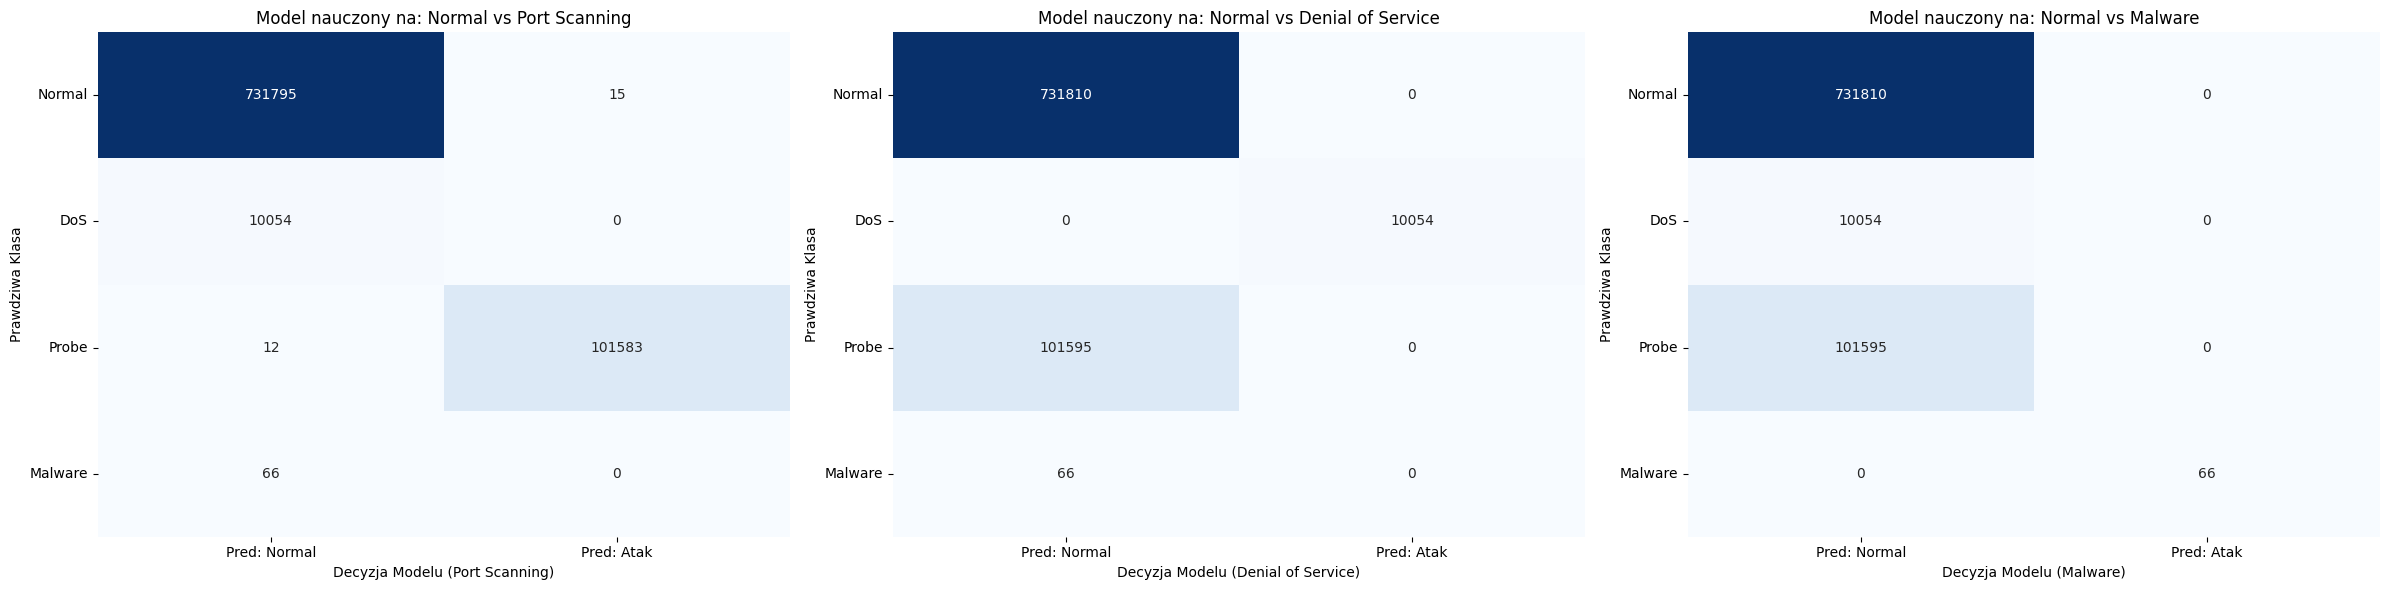

In [ ]:
import seaborn as sns
# Rysowanie 4 heatmap obok siebie
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
attack_map = {
    'Port Scanning': 2,
    'Denial of Service': 1,
    'Malware': 3
}
classes_all_names = ['Normal', 'DoS', 'Probe', 'Malware']

for i, (attack_name, df_cm) in enumerate(results.items()):
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Model nauczony na: Normal vs {attack_name}')
    axes[i].set_yticklabels(classes_all_names, rotation=0)
    axes[i].set_xticklabels(['Pred: Normal', 'Pred: Atak'])

plt.tight_layout()
plt.show()

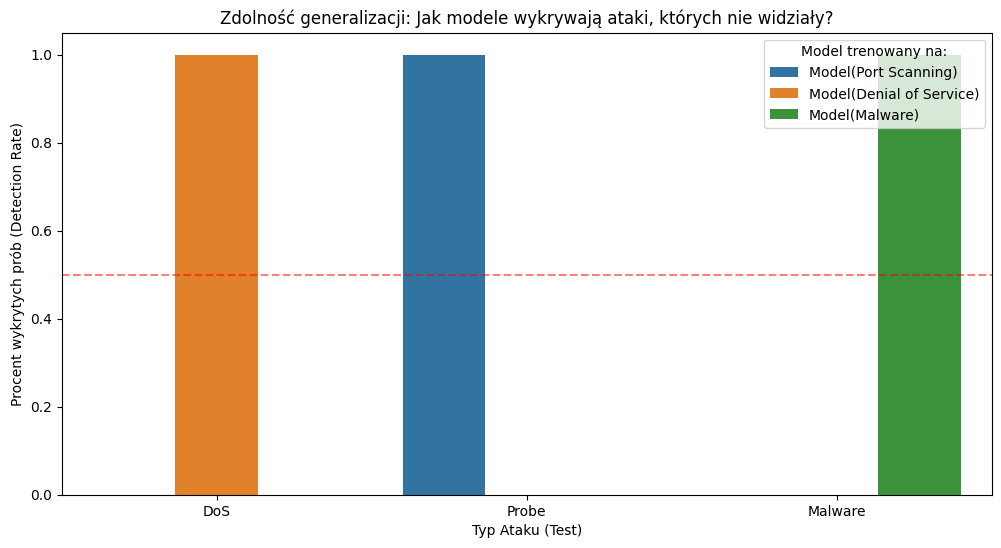

In [ ]:

summary_data = []

for model_name, cm in results.items():
    for real_class_id in [1, 2, 3]: 
        total = cm.loc[real_class_id].sum()
        detected = cm.loc[real_class_id, 1] 
        accuracy = detected / total
        
        real_class_name = classes_all_names[real_class_id]
        
        summary_data.append({
            'Model': f'Model({model_name})',
            'Typ Ataku (Test)': real_class_name,
            'Wykrywalność': accuracy
        })

df_plot = pd.DataFrame(summary_data)

# Rysowanie
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Typ Ataku (Test)', y='Wykrywalność', hue='Model')
plt.title('Zdolność generalizacji: Jak modele wykrywają ataki, których nie widziały?')
plt.ylabel('Procent wykrytych prób (Detection Rate)')
plt.ylim(0, 1.05)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5) # Linia 50%
plt.legend(title='Model trenowany na:', loc='upper right')
plt.show()